#### 7. 검색 결과 첫 페이지에 있는 상세 내용들을 가져오기

In [25]:
import numpy as np
no = int(input("첫 페이지의 검색 건수를 입력하세요: "))

from bs4 import BeautifulSoup

from selenium import webdriver
chrome_path = 'E:\\py_temp\\WebCrawling\\chromedriver.exe'
driver = webdriver.Chrome(chrome_path)
url = 'https://korean.visitkorea.or.kr/'
driver.get(url)
driver.maximize_window()
import time
time.sleep(3)
search_bar = driver.find_element_by_id("inp_search")  
search_bar.click()
search_bar.send_keys("부산")
search_bar.send_keys("\n")
infor = driver.find_element_by_xpath("//*[@id='tabView1']/a")
infor.click()
time.sleep(1)

title = []
share_num = []
keyword = []
like_num = []
view_num = []
contents = []           

# 상세페이지 클릭후: 내용, 좋아요 수 등 긁어오기
def get():
    full_html = driver.page_source
    soup = BeautifulSoup(full_html,'html.parser')
    content_list = soup.find('div',id="contents")
    head = content_list.find('div','titleType1')
    body = content_list.find('div','course_detail')
    try:
        title.append(head.find('div','tit').get_text().strip())
    except:
        title.append(head.find('h2',id="topTitle").get_text().strip())
    share_num.append(head.find('span',id='conShare').get_text().strip())
    try:
        keyword.append(content_list.find('div','tag').get_text().strip())
    except:
        keyword.append("태그 없음")
    like_num.append(head.find('span',id="conLike").get_text().strip())
    view_num.append(head.find('span',id="conRead").get_text().strip())
    try:
        contents.append(body.find('div',"inr").get_text().strip())
    except:
        contents.append("내용 없음")

def page_click():
    detail = driver.find_element_by_xpath("//*[@id='listBody']/ul/li[%s]/div[2]/div[1]/a" %x)
    detail.click()
    time.sleep(1)
    get()
    driver.back()
    time.sleep(1)

if int(no) < 5:
    for x in range(1,no+1):
        try:
            page_click()
        except:
            pass
else:
    for x in range(1,no+2):
        try:
            page_click()
        except:
            pass

travel = [title,like_num,share_num,view_num,keyword,contents]
            
for i in range(0,len(title)):
    print('\n')
    print("1. 제목:", travel[0][i])
    print("2. 좋아요:", travel[1][i])
    print("3. 공유:", travel[2][i])
    print("4. 조회수:", travel[3][i])
    print("5. 키워드:", travel[4][i])
    print("6. 내용:", travel[5][i])
    print('\n')
    print('-'*80)

첫 페이지의 검색 건수를 입력하세요: 3


C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_6496/305906732.py:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(chrome_path)
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_6496/305906732.py:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  search_bar = driver.find_element_by_id("inp_search")
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_6496/305906732.py:18: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  infor = driver.find_element_by_xpath("//*[@id='tabView1']/a")
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_6496/305906732.py:53: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  detail = driver.find_element_by_xpath("//*[@id='listBody']/ul/li[%s]/div[2]/div[1]/a" %x)


1
1
1


1. 제목: 4코스부산의 자연생태 체험 코스
2. 좋아요: 12
3. 공유: 45
4. 조회수: 13.3K
5. 키워드: 태그 #1박2일#2박3일#경상권#국립해양박물관#군위장곡자연휴양림#당일코스#데이트코스#바다풍경#박물관#부산암남공원#아미산전망대#여름여행#연인과함께#영도등대#자연좋은곳#추천코스#힐링
6. 내용: 부산은 바다가 있는 큰 도시로 다양한 코스, 체험거리, 즐길거리가 무궁무진하다. 그중에서도 이 코스는 부산을 둘러싼 육지 자연환경과 바다환경과 생물들을 골고루 둘러볼 수 있는 코스다. 코스 중간에 부산이 가진 다양한 별미 맛보는 것도 잊지 말자.


--------------------------------------------------------------------------------


1. 제목: 4코스영화보다 더 영화 같은 여행, 부산
2. 좋아요: 8
3. 공유: 149
4. 조회수: 24.8K
5. 키워드: 태그 #1박2일#2박3일#당일코스#데이트코스#도심여행#바다풍경#복합문화공간#부산영화의전당#스카이워크#신세계센텀시티#연인과함께#영화촬영지#오륙도스카이워크#이기대도시자연공원#추천코스#친구와함께#핫플레이스
6. 내용: 부산은 영화의 도시다. 1천만 관객이 넘은 <해운대> <도둑들> <변호인> 같은 영화들의 주 무대가 부산이었다. 영화 속 그곳을 찾아 떠나보는 부산여행, 부산을 즐기는 또 다른 방법이다.


--------------------------------------------------------------------------------


1. 제목: BUTI 부산 시티투어 2층버스 야경투어
2. 좋아요: 2
3. 공유: 41
4. 조회수: 5.7K
5. 키워드: 태그 없음
6. 내용: 내용 없음


--------------------------------------------------------------------------------


#### 8. 상세 페이지 크롤링: 사용자에게서 입력 받은 검색 건수만큼 각각의 상세 페이지 내용들을 가져오기
- 페이지 수 만큼 페이지 넘김
- 요청 검색건수에 도달시 중단
- 실제 아티클 수 초과시 중단

In [26]:
import numpy as np
cnt = int(input("검색 건수를 입력하세요: "))
page_no = np.ceil(cnt/10)
print("열람할 수 있는 페이지 수는: ", page_no)
no = int(cnt-(int(page_no)-1)*10)

from bs4 import BeautifulSoup

# 대한민국 구석구석 창 열기
from selenium import webdriver
chrome_path = 'E:\\py_temp\\WebCrawling\\chromedriver.exe'
driver = webdriver.Chrome(chrome_path)
url = 'https://korean.visitkorea.or.kr/'
driver.get(url)
driver.maximize_window()
import time
time.sleep(3)
# 검색창에 '부산' 입력하기
search_bar = driver.find_element_by_id("inp_search")  
search_bar.click()
search_bar.send_keys("부산")
search_bar.send_keys("\n")
# 여행정보 클릭
infor = driver.find_element_by_xpath("//*[@id='tabView1']/a")
infor.click()

title = []
share_num = []
keyword = []
like_num = []
view_num = []
contents = []           

# 상세페이지 클릭후: 내용, 좋아요 수 등 긁어오기
def get():
    full_html = driver.page_source
    soup = BeautifulSoup(full_html,'html.parser')
    content_list = soup.find('div',id="contents")
    head = content_list.find('div','titleType1')
    body = content_list.find('div','course_detail')
    try:
        title.append(head.find('div','tit').get_text().strip())
    except:
        title.append(head.find('h2',id="topTitle").get_text().strip())
    share_num.append(head.find('span',id='conShare').get_text().strip())
    try:
        keyword.append(content_list.find('div','tag').get_text().strip())
    except:
        keyword.append("태그 없음")
    like_num.append(head.find('span',id="conLike").get_text().strip())
    view_num.append(head.find('span',id="conRead").get_text().strip())
    try:
        contents.append(body.find('div',"inr").get_text().strip())
    except:
        contents.append("내용 없음")

# 상세페이지 클릭하고 크롤링 후 나가기
def page_click():
    detail = driver.find_element_by_xpath("//*[@id='listBody']/ul/li[%s]/div[2]/div[1]/a" %x)
    detail.click()
    print(1)
    time.sleep(1)
    get()
    print(2)
    driver.back()
    time.sleep(1)

# 페이지 넘기며 크롤링하기
for i in range(1,int(page_no)+1):
    time.sleep(2) # Sleep하지 않고 바로 Click()을 하면 오류가 날 수 있음을 유의해야 한다.
    page = driver.find_element_by_link_text("%s" %i)
    page.click()
    if i == 1:
        if cnt < 5:
            for x in range(1,cnt+1):
                try:
                    page_click()
                except:
                    continue
        elif cnt <= 10:
            for x in range(1,cnt+2):
                try:
                    page_click()
                except:
                    continue
        else:
            for x in range(1,12):
                try:
                    page_click()
                except:
                    continue
    elif i == int(page_no): # 마지막 페이지 (첫페이지 제외)
        for x in range(1,no+1):
            try:
                page_click()
            except:
                continue
    else:
        for x in range(1,11):
            try:
                page_click()
            except:
                continue

travel = [title,like_num,share_num,view_num,keyword,contents]
            
for i in range(0,len(title)):
    print('\n')
    print("1. 제목:", travel[0][i])
    print("2. 좋아요:", travel[1][i])
    print("3. 공유:", travel[2][i])
    print("4. 조회수:", travel[3][i])
    print("5. 키워드:", travel[4][i])
    print("6. 내용:", travel[5][i])
    print('\n')
    print('-'*80)

검색 건수를 입력하세요: 22
열람할 수 있는 페이지 수는:  3.0


C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_6496/3393103706.py:12: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(chrome_path)
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_6496/3393103706.py:19: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  search_bar = driver.find_element_by_id("inp_search")
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_6496/3393103706.py:24: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  infor = driver.find_element_by_xpath("//*[@id='tabView1']/a")
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_6496/3393103706.py:71: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  page = driver.find_element_by_link_text("%s" %i)
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_6496/3393103706.py:59: DeprecationWarning: find_element_by_* commands are deprecat

1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2


1. 제목: 4코스영화보다 더 영화 같은 여행, 부산
2. 좋아요: 8
3. 공유: 149
4. 조회수: 24.8K
5. 키워드: 태그 #1박2일#2박3일#당일코스#데이트코스#도심여행#바다풍경#복합문화공간#부산영화의전당#스카이워크#신세계센텀시티#연인과함께#영화촬영지#오륙도스카이워크#이기대도시자연공원#추천코스#친구와함께#핫플레이스
6. 내용: 부산은 영화의 도시다. 1천만 관객이 넘은 <해운대> <도둑들> <변호인> 같은 영화들의 주 무대가 부산이었다. 영화 속 그곳을 찾아 떠나보는 부산여행, 부산을 즐기는 또 다른 방법이다.


--------------------------------------------------------------------------------


1. 제목: BUTI 부산 시티투어 2층버스 야경투어
2. 좋아요: 2
3. 공유: 41
4. 조회수: 5.7K
5. 키워드: 태그 없음
6. 내용: 내용 없음


--------------------------------------------------------------------------------


1. 제목: 5코스부산의 가을은 영화로 들썩인다
2. 좋아요: 0
3. 공유: 50
4. 조회수: 6.7K
5. 키워드: 태그 #추천코스
6. 내용: 부산하면 빼놓을 수 없는 것이 바로 ‘부산국제영화제’. 꼭 영화를 보지 않아도 된다. 영화제 기간에는 도시 전체가 축제 분위기여서 부산에 있는 것만으로도 누구나 흥겨워진다. 전야제 행사가 열리는 BIFF광장에서 스타들을 스쳐 지날 수도 있고, 운이 좋으면 자갈치시장이나 해운대해수욕장 횟집에서 스타들과 한 잔 술을 나눌 가능성도 있다. 생각만 해도 즐겁지 않은가!


---------------------------------------------------------------------------

#### '검색어+timestamp'로 저장 폴더 생성하기
- 현재 시간은 'now'로 저장하기

In [27]:
# 현재 시간 저장하기
import time # 시간 모듈 불러오기
query_txt = '검색어'
now = time.localtime() # 현재시간 불러오기
s = '%04d-%02d-%02d-%02d-%02d-%02d' %(now.tm_year,now.tm_mon,now.tm_mday,now.tm_hour,now.tm_min,now.tm_sec)

f_dir = "E:\\py_temp\\WebCrawling" # 입력 받은 경로

print(f_dir+query_txt+'-'+s)

E:\py_temp\WebCrawling검색어-2021-11-22-17-07-00


In [ ]:
import os
os.makedirs(f_dir+query_txt+'-'+s) # 폴더 생성
os.chdir(f_dir+query_txt+'-'+s) # 폴더 지정
# 크롤링 결과 저장할 폴더 이름
f_dir_final = f_dir+query_txt+'-'+s

#### 자동으로 스크롤 다운하기
-> 구글 이미지 등 스크롤 다운으로 해야 새로운 이미지가 뜨기 때문에 스크롤 다운이 필요

In [38]:
def scroll_down(driver):
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")
    time.sleep(1)
scroll_down(driver)

#### 이미지 추출  
① URL을 가져오기 위한 파이썬 모듈을 지정한다.
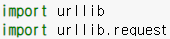  

② 이미지의 src(출처)의 태그를 담아 둘 리스트 및 이미지 저장 파일 이름을 지정한다.
ex) 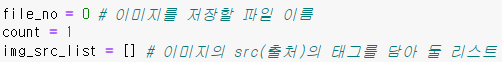
- 이미지 src(출처)의 태그를 각각 담아 두어야 For Loop을 이용하여 이미지 저장이 용이하다.  

③ 현재 페이지의 HTML 전체 코드를 모두 지정하고, HTML 전체 코드를 가지고 온다.
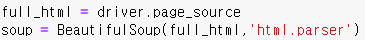  

④ 원하는 사진이 있는 body를 지정한다.
  

⑤ 지정한 body에서 'img' 태그 값을 가지는 요소들을 모두 데려온다.
  

⑥ 추출한 이미지 HTML 태그를 img_src_list에 담아 준다.
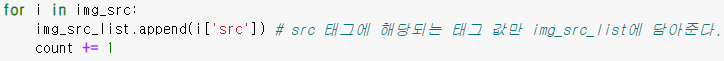  

⑦ 저장할 파일을 만들고 경로 지정하기
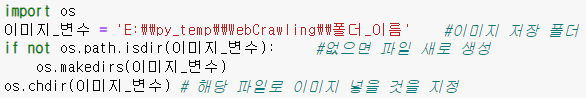
- 만일 이미지_변수에 '\\폴더_이름'을 넣지 않으면 폴더가 새로 생성되지 않으며, chdir로 인해 경로만 지정된다.

⑧ 각 링크에서 이미지 다운받아 온다.  
ex) 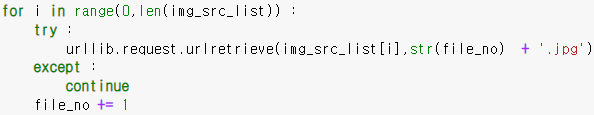

In [2]:
from bs4 import BeautifulSoup

# 대한민국 구석구석 창 열기
from selenium import webdriver
chrome_path = 'E:\\py_temp\\WebCrawling\\chromedriver.exe'
driver = webdriver.Chrome(chrome_path)
url = 'https://korean.visitkorea.or.kr/'
driver.get(url)
driver.maximize_window()
import time
time.sleep(3)
# 검색창에 '부산' 입력하기
search_bar = driver.find_element_by_id("inp_search")  
search_bar.click()
search_bar.send_keys("부산")
search_bar.send_keys("\n")
# 부산 일몰 명소 클릭
infor = driver.find_element_by_xpath("//*[@id='listBody']/ul/li[6]/div[2]/div[1]/a")
infor.click()

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_12060/2890906369.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(chrome_path)
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_12060/2890906369.py:13: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  search_bar = driver.find_element_by_id("inp_search")
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_12060/2890906369.py:18: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  infor = driver.find_element_by_xpath("//*[@id='listBody']/ul/li[6]/div[2]/div[1]/a")


In [32]:
import urllib
import urllib.request

file_no = 0 # 이미지를 저장할 파일 이름
count = 1
img_src_list = [] # 이미지의 src(출처)의 태그를 담아 둘 리스트

full_html = driver.page_source
soup = BeautifulSoup(full_html,'html.parser')

# 원하는 사진이 있는 body 지정
img_src = soup.find('div','box_txtPhoto')

# 지정한 body에서 'img' 태그 값을 가지는 요소들을 모두 데려온다.
img_src = img_src.find_all('img')

# 추출한 이미지 HTML 태그를 img_src_list에 담아 준다.
for i in img_src:
    img_src_list.append(i['src']) # src 태그에 해당되는 태그 값만 img_src_list에 담아준다.
    count += 1
    
# 저장경로 지정하기
import os
img_folder_path = 'E:\\py_temp\\WebCrawling\\img_folder'    #이미지 저장 폴더
if not os.path.isdir(img_folder_path):     #없으면 파일 새로 생성
    os.makedirs(img_folder_path)
os.chdir(img_folder_path)

# 각 링크에서 이미지 다운받아 오기
for i in range(0,len(img_src_list)) :
    try :
        urllib.request.urlretrieve(img_src_list[i],str(file_no)  + '.jpg')
    except :
        continue        
    file_no += 1                
    time.sleep(0.5)  
    print("%s번째 이미지 저장중.." %file_no)

1번째 이미지 저장중..
2번째 이미지 저장중..
3번째 이미지 저장중..
4번째 이미지 저장중..
5번째 이미지 저장중..
6번째 이미지 저장중..
7번째 이미지 저장중..
8번째 이미지 저장중..
9번째 이미지 저장중..
10번째 이미지 저장중..
11번째 이미지 저장중..
12번째 이미지 저장중..
13번째 이미지 저장중..
14번째 이미지 저장중..
15번째 이미지 저장중..
16번째 이미지 저장중..
17번째 이미지 저장중..


실습) 각 상세 페이지에서 이미지 다운받아 오기

In [9]:
import numpy as np
cnt = int(input("검색 건수를 입력하세요: "))
page_no = np.ceil(cnt/10)
print("열람할 수 있는 페이지 수는: ", page_no)
no = int(cnt-(int(page_no)-1)*10)

from bs4 import BeautifulSoup

# 대한민국 구석구석 창 열기
from selenium import webdriver
chrome_path = 'E:\\py_temp\\WebCrawling\\chromedriver.exe'
driver = webdriver.Chrome(chrome_path)
url = 'https://korean.visitkorea.or.kr/'
driver.get(url)
driver.maximize_window()
import time
time.sleep(3)
# 검색창에 '부산' 입력하기
search_bar = driver.find_element_by_id("inp_search")  
search_bar.click()
search_bar.send_keys("부산")
search_bar.send_keys("\n")
# 여행정보 클릭
infor = driver.find_element_by_xpath('//*[@id="tabView2"]/a')
infor.click()

import urllib
import urllib.request
import os
import time
now = time.localtime()
s = '%04d-%02d-%02d-%02d-%02d-%02d' %(now.tm_year,now.tm_mon,now.tm_mday,now.tm_hour,now.tm_min,now.tm_sec)

# 상세페이지 클릭후: 이미지 긁어오기
def get():
    file_no = 0
    count = 1
    img_src_list = []
    full_html = driver.page_source
    soup = BeautifulSoup(full_html,'html.parser')
    head = soup.find('div','tit_cont titleType1')
    try:
        title = head.find('div','tit').get_text().strip()
    except:
        title = head.find('h2',id="topTitle").get_text().strip()
    img_folder_path = 'E:\\py_temp\\WebCrawling\\img_folder\\%s' %title
    if not os.path.isdir(img_folder_path):
        os.makedirs(img_folder_path)
    os.chdir(img_folder_path)
    img_src = soup.find('div','box_txtPhoto')
    img_src = img_src.find_all('img')
    for i in img_src:
        img_src_list.append(i['src'])
        count += 1
    print(img_src_list)
    for i in range(0,len(img_src_list)) :
        try :
            urllib.request.urlretrieve(img_src_list[i], title+str(file_no)+'-'+s+'.jpg')
        except :
            continue        
        file_no += 1              
        time.sleep(0.5)    

# 상세페이지 클릭하고 크롤링 후 나가기
def page_click():
    detail = driver.find_element_by_xpath("//*[@id='listBody']/ul/li[%s]/div[2]/div[1]/a" %x)
    detail.click()
    print(1)
    time.sleep(1)
    get()
    print(2)
    driver.back()
    time.sleep(1)

# 페이지 넘기며 크롤링하기
for i in range(1,int(page_no)+1):
    time.sleep(2)
    page = driver.find_element_by_link_text("%s" %i)
    page.click()
    if i == 1:
        if cnt < 5:
            for x in range(1,cnt+1):
                try:
                    page_click()
                except:
                    continue
        elif cnt <= 10:
            for x in range(1,cnt+2):
                try:
                    page_click()
                except:
                    continue
        else:
            for x in range(1,12):
                try:
                    page_click()
                except:
                    continue
    elif i == int(page_no):
        for x in range(1,no+1):
            try:
                page_click()
            except:
                continue
    else:
        for x in range(1,11):
            try:
                page_click()
            except:
                continue

검색 건수를 입력하세요: 22
열람할 수 있는 페이지 수는:  3.0


C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_12060/4287829745.py:12: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(chrome_path)
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_12060/4287829745.py:19: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  search_bar = driver.find_element_by_id("inp_search")
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_12060/4287829745.py:24: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  infor = driver.find_element_by_xpath('//*[@id="tabView2"]/a')
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_12060/4287829745.py:78: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  page = driver.find_element_by_link_text("%s" %i)
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_12060/4287829745.py:66: DeprecationWarning: find_element_by_* commands are dep

1
['https://cdn.visitkorea.or.kr/img/call?cmd=VIEW&id=95726c83-ca11-44aa-b688-4defb46affca', 'https://cdn.visitkorea.or.kr/img/call?cmd=VIEW&id=03e0fcb1-49ee-4341-b30a-76237e2a9763', 'https://cdn.visitkorea.or.kr/img/call?cmd=VIEW&id=1141ad69-e483-43a2-baeb-6016b1ecff46', 'https://cdn.visitkorea.or.kr/img/call?cmd=VIEW&id=89c41cf3-d611-46c8-9943-30fccb17571f', 'https://cdn.visitkorea.or.kr/img/call?cmd=VIEW&id=dc91f5fd-3de8-4bb8-ad08-fb6767a0eb2c', 'https://cdn.visitkorea.or.kr/img/call?cmd=VIEW&id=310eafd3-f5ae-41d2-9eb8-5a0fce976189', 'https://cdn.visitkorea.or.kr/img/call?cmd=VIEW&id=de61a2fb-0422-4ea0-ac0b-2046318372bf', 'https://cdn.visitkorea.or.kr/img/call?cmd=VIEW&id=9aa700b1-f6ea-4b91-88ad-0e7e599536ea', 'https://cdn.visitkorea.or.kr/img/call?cmd=VIEW&id=55c5bc06-5d8a-4b71-98e9-744d8b5b44d6', 'https://cdn.visitkorea.or.kr/img/call?cmd=VIEW&id=747a340f-c432-42ef-bc9d-74c6a1efcceb', 'https://cdn.visitkorea.or.kr/img/call?cmd=VIEW&id=65a8b173-1f9c-4410-849f-7274ba480965', 'https: